In [1]:
import sys
import os

In [2]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [3]:
from scripts.utils import *

In [8]:
dfs = load_data(file_paths)
benin_data = dfs['Benin']
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [9]:
benin_data = convert_timestamp(benin_data)
print(f"Benin dataframe 'Timestamp' dtype: {benin_data['Timestamp'].dtype}")
benin_data.set_index('Timestamp', inplace=True)

Benin dataframe 'Timestamp' dtype: datetime64[ns]


## summary statistics

In [10]:
print(benin_data.info())
print(benin_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


##  Check for Missing Values and Outliers

In [11]:
data_check({'Benin': benin_data})


Data Quality Check for Benin:
Missing Values: 525600
Comments    525600
dtype: int64

Negative values in GHI:
Number of negative values: 258847

Outliers in GHI:
Number of outliers: 145
Percentage of outliers: 0.03%

Negative values in DNI:
Number of negative values: 275987

Outliers in DNI:
Number of outliers: 15196
Percentage of outliers: 2.89%

Negative values in DHI:
Number of negative values: 259182

Outliers in DHI:
Number of outliers: 8733
Percentage of outliers: 1.66%

Outliers in ModA:
Number of outliers: 98
Percentage of outliers: 0.02%

Outliers in ModB:
Number of outliers: 240
Percentage of outliers: 0.05%

Outliers in Tamb:
Number of outliers: 222
Percentage of outliers: 0.04%

Outliers in WS:
Number of outliers: 6717
Percentage of outliers: 1.28%

Outliers in WSgust:
Number of outliers: 5368
Percentage of outliers: 1.02%

Outliers in WSstdev:
Number of outliers: 107372
Percentage of outliers: 20.43%

Outliers in WDstdev:
Number of outliers: 7251
Percentage of outliers: 1

### Time Series Analysis for 'GHI', 'DNI', 'DHI', and 'Tamb'

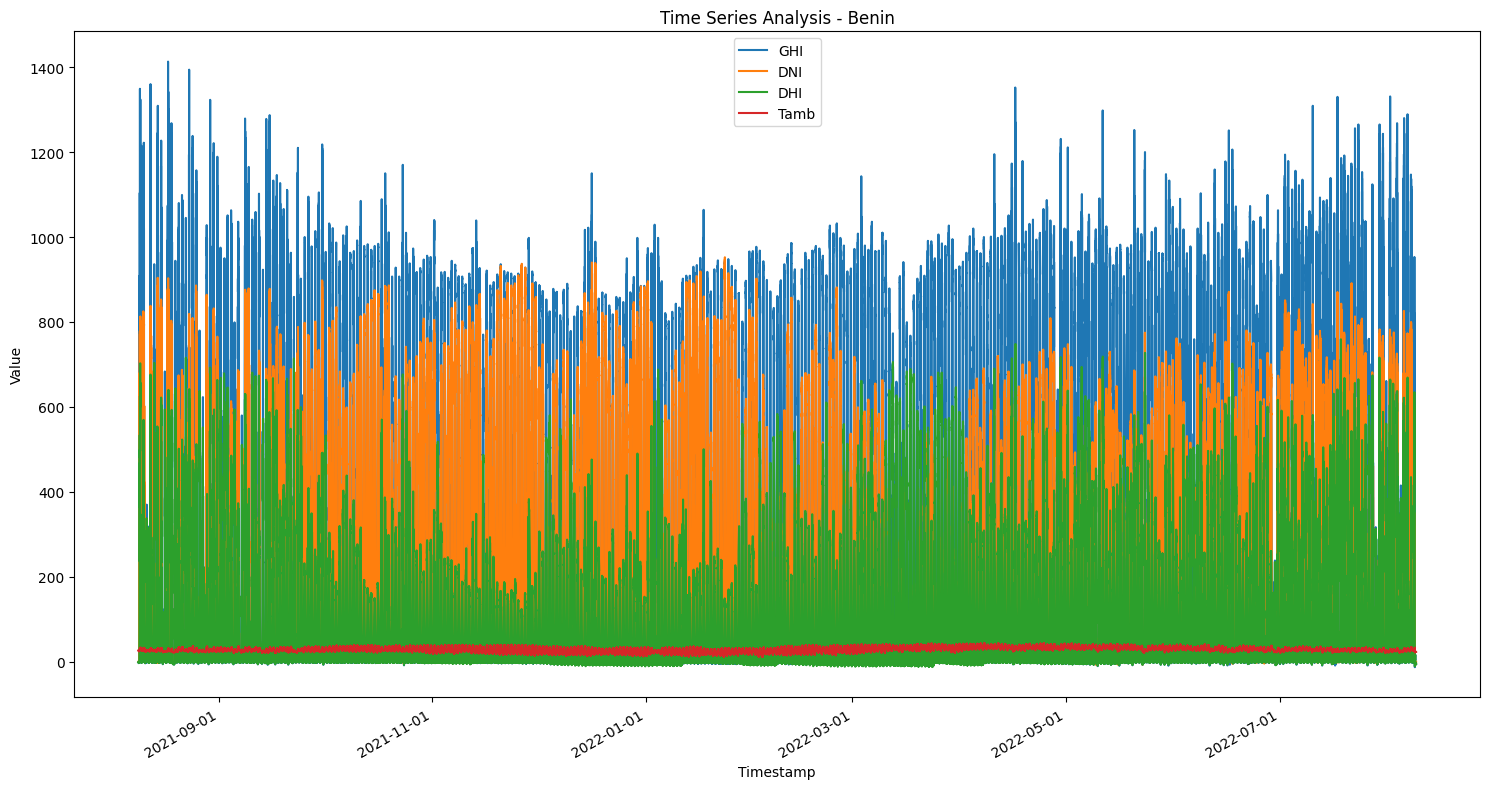

In [12]:
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

# Call the function
time_series({'Benin': benin_data}, columns_to_plot)

### Time Series Analysis for 'Cleaning', 'ModA', 'ModB'

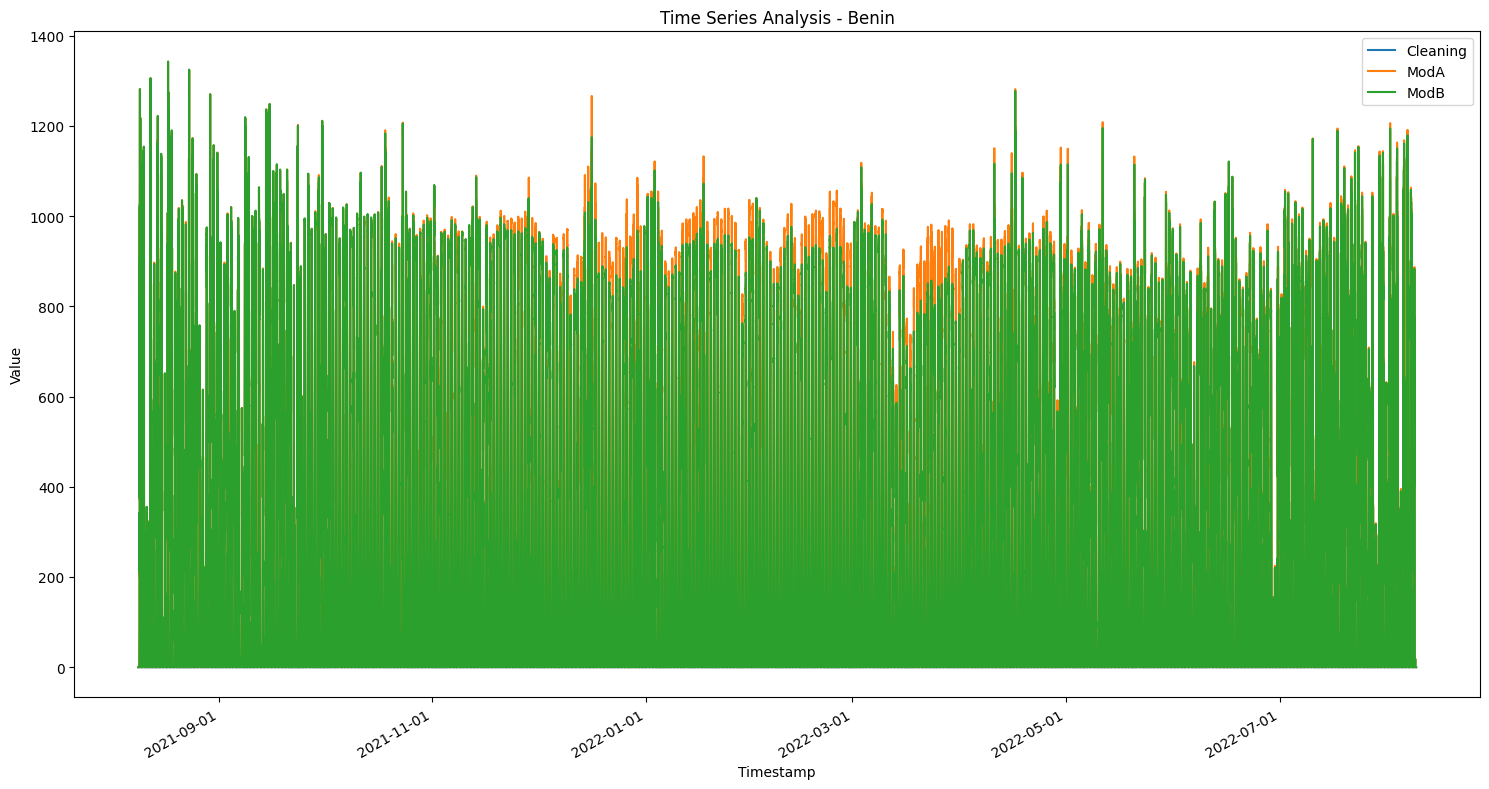

In [13]:
columns_to_plot = ['Cleaning', 'ModA', 'ModB']
plot_time_series_combined({'Benin': benin_data}, columns_to_plot)

### Correlation Analysis

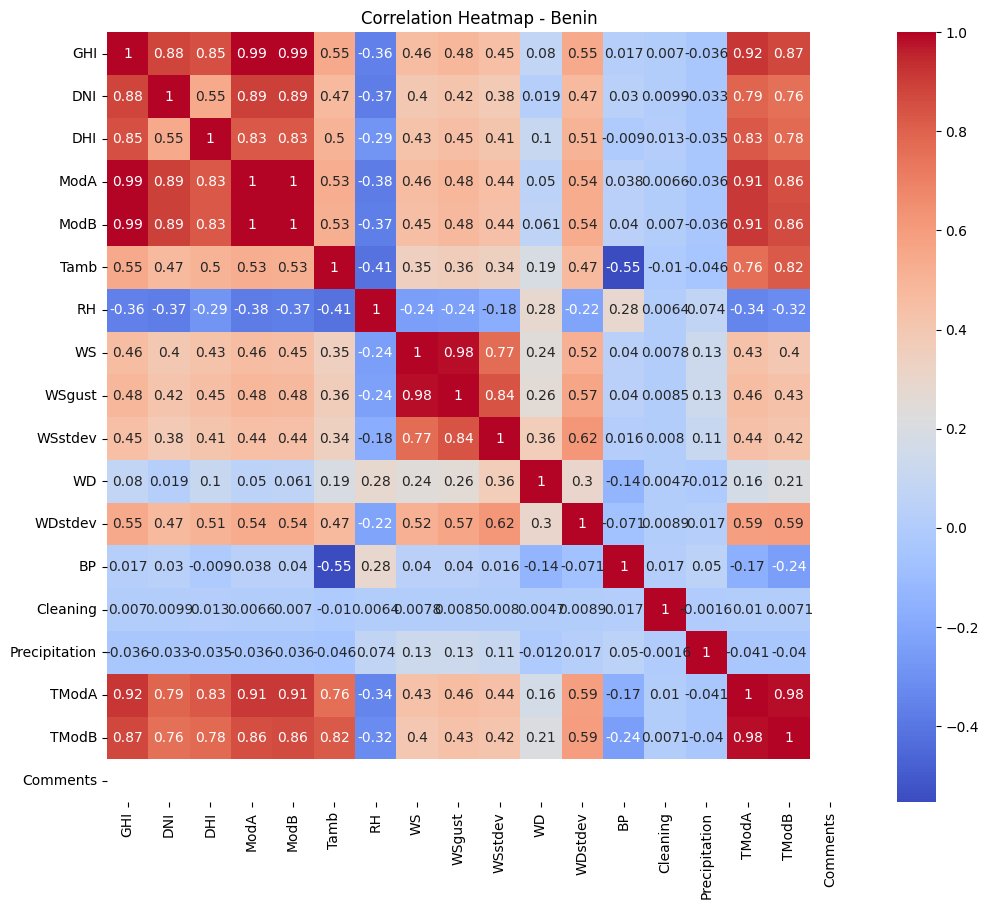

In [14]:
plot_correlation_heatmap(benin_data, 'Benin')

### Wind Analysis 

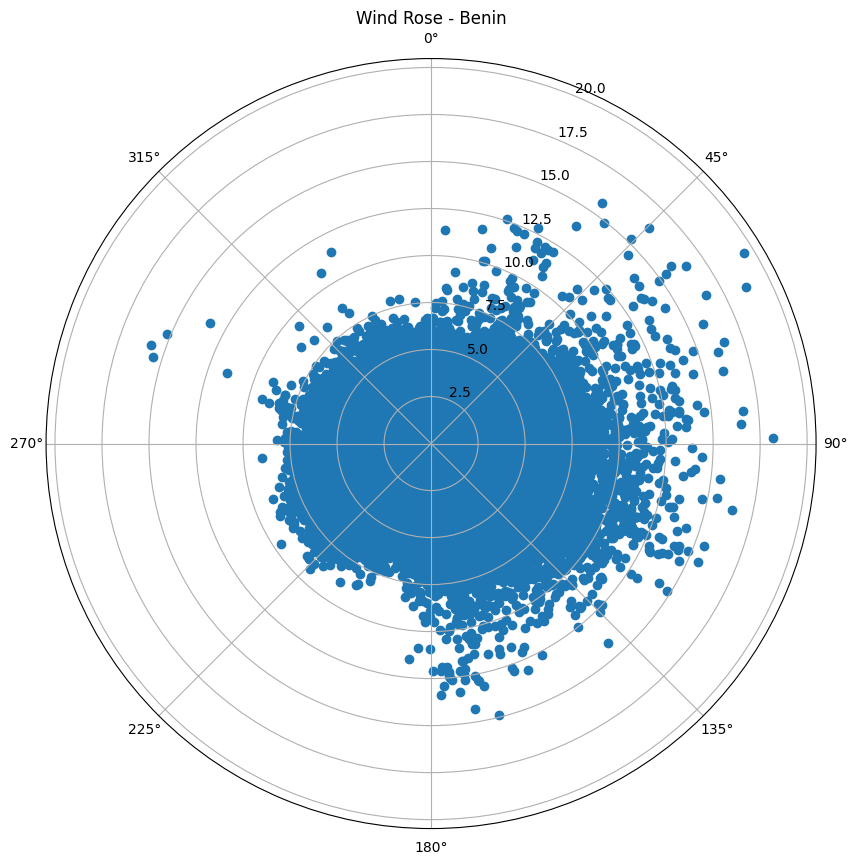

In [15]:
plot_wind_rose(benin_data, 'Benin')

### Histogram 

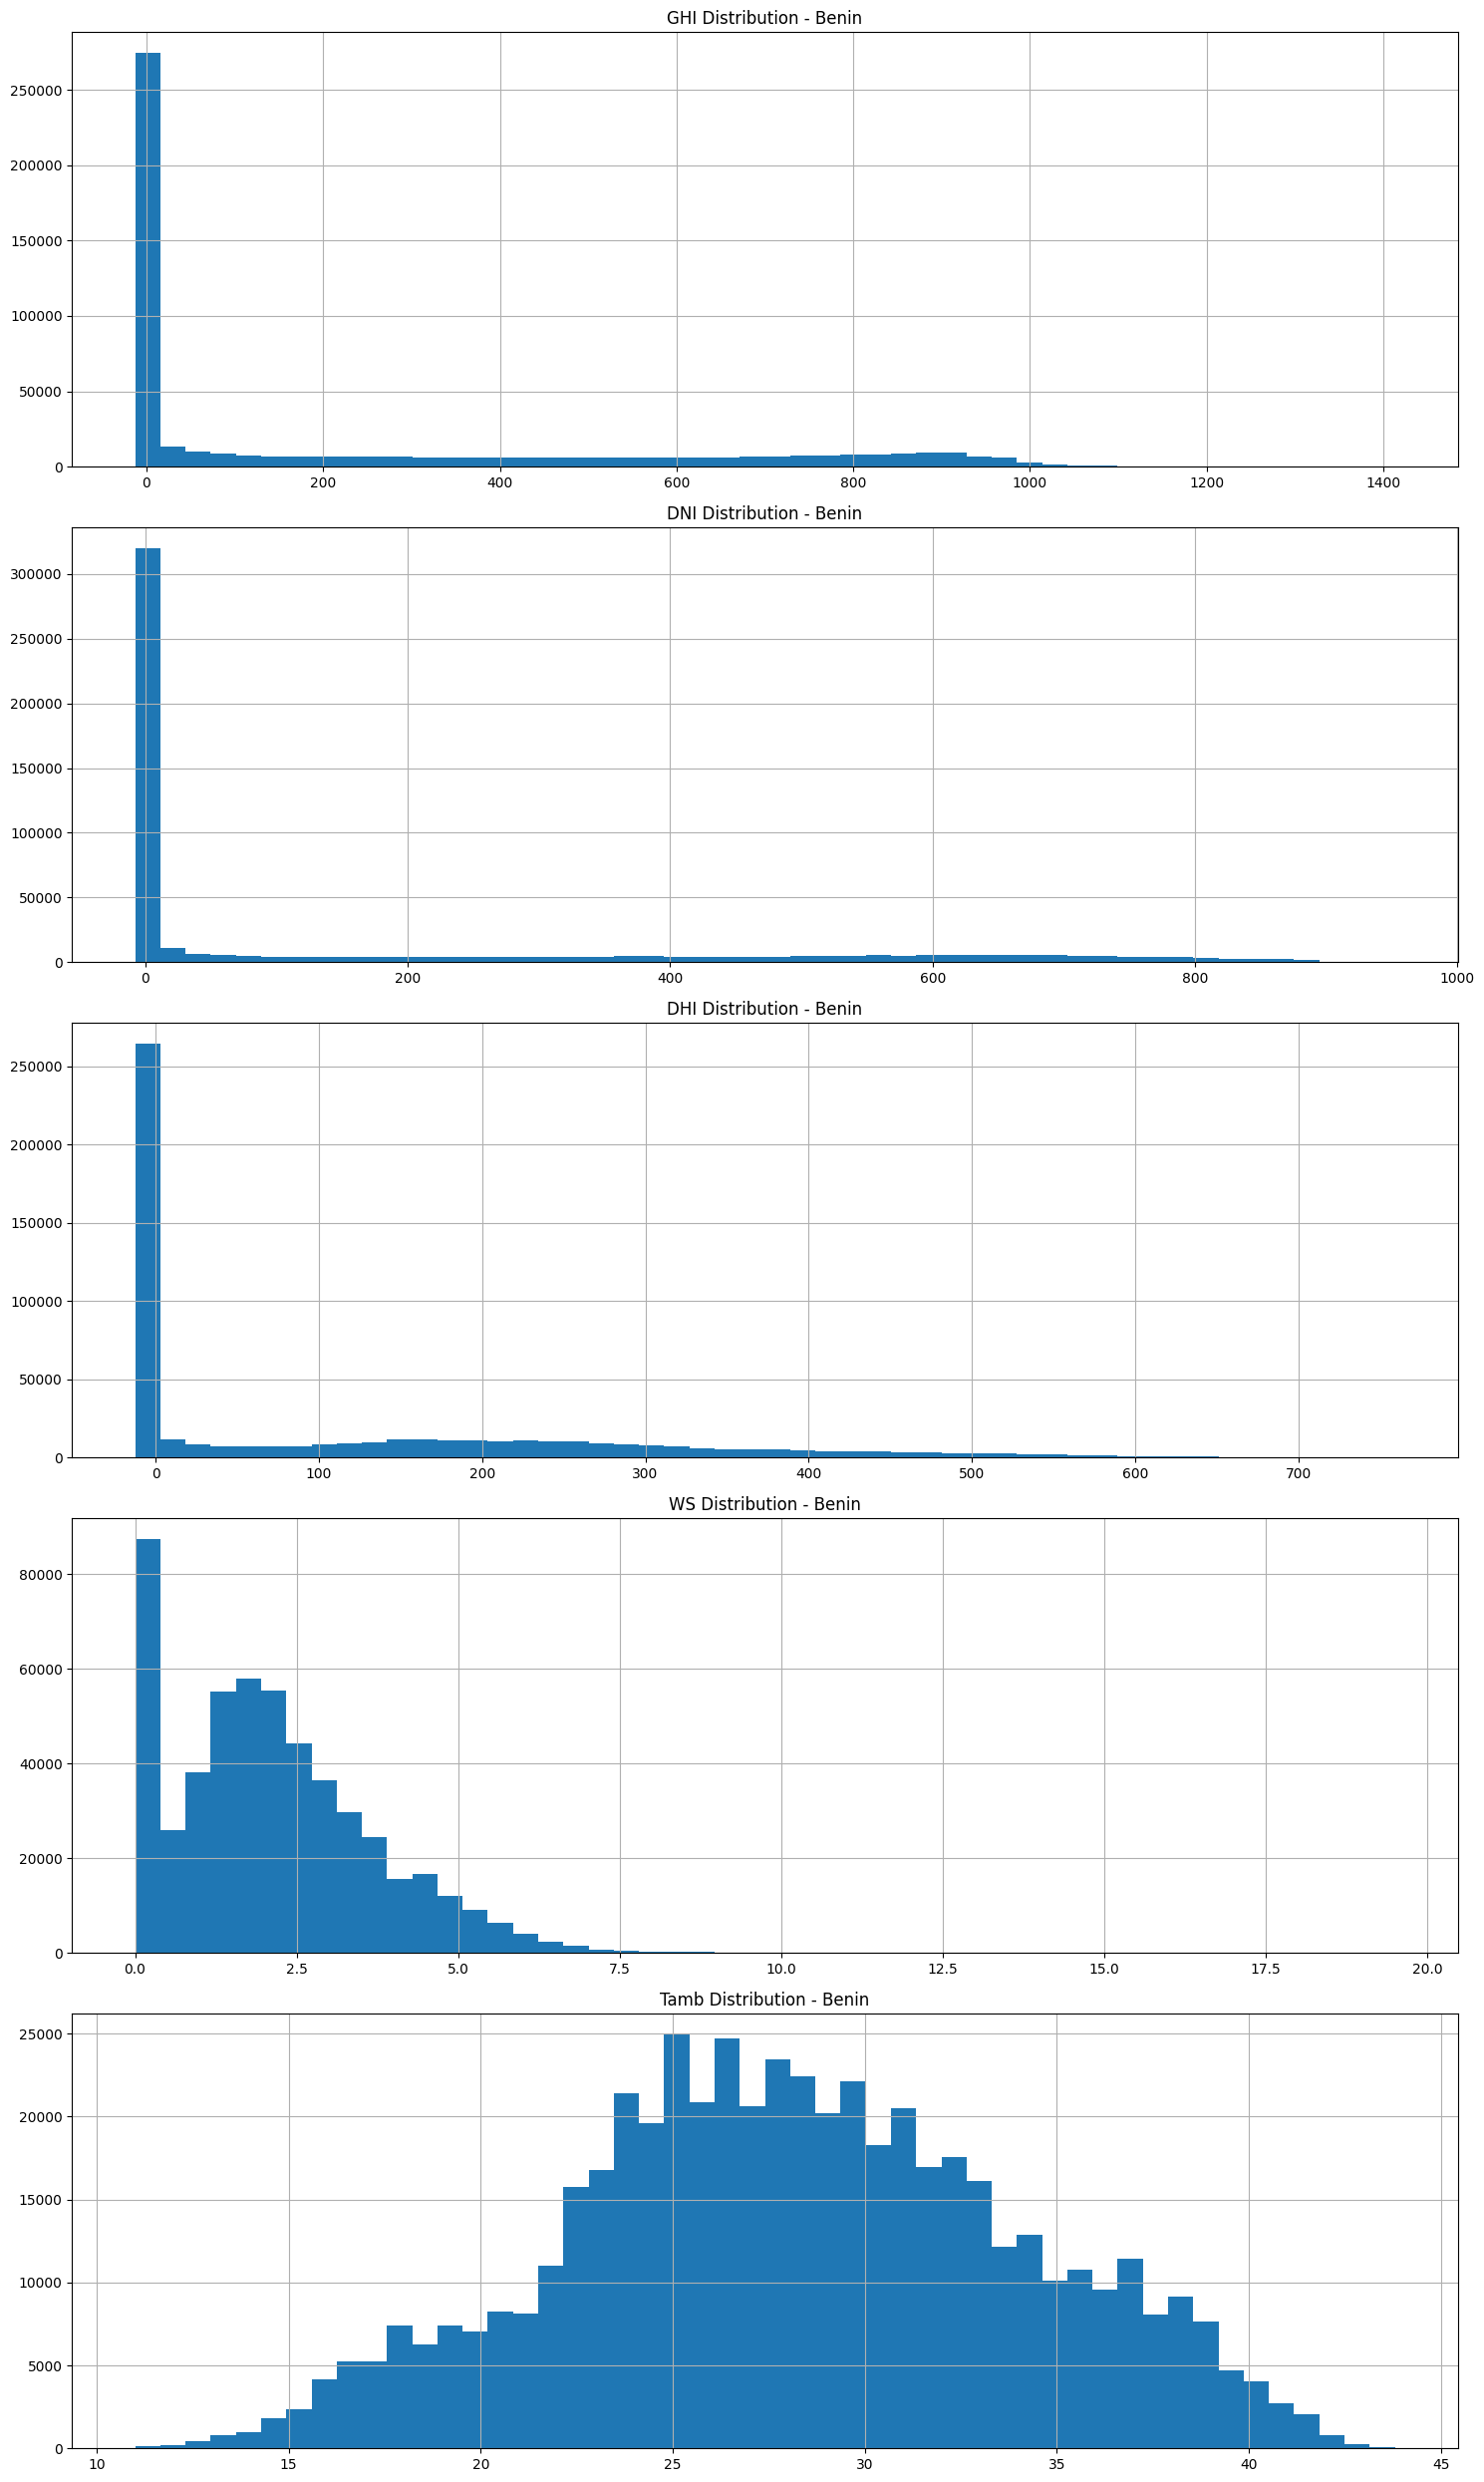

In [16]:
plot_histograms(benin_data, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb'], 'Benin')

### Z Score Analysis 

In [17]:
benin_z_scores = calculate_z_scores(benin_data)
print("\nZ-scores exceeding 3 for Benin:")
print((benin_z_scores > 3).sum())


Z-scores exceeding 3 for Benin:
GHI                89
DNI                 0
DHI              3738
ModA               27
ModB               63
Tamb                0
RH                  0
WS               3109
WSgust           3500
WSstdev          5653
WD                  0
WDstdev          4765
BP                865
Cleaning          485
Precipitation    1402
TModA              10
TModB              98
Comments            0
dtype: int64


### Bubble charts 

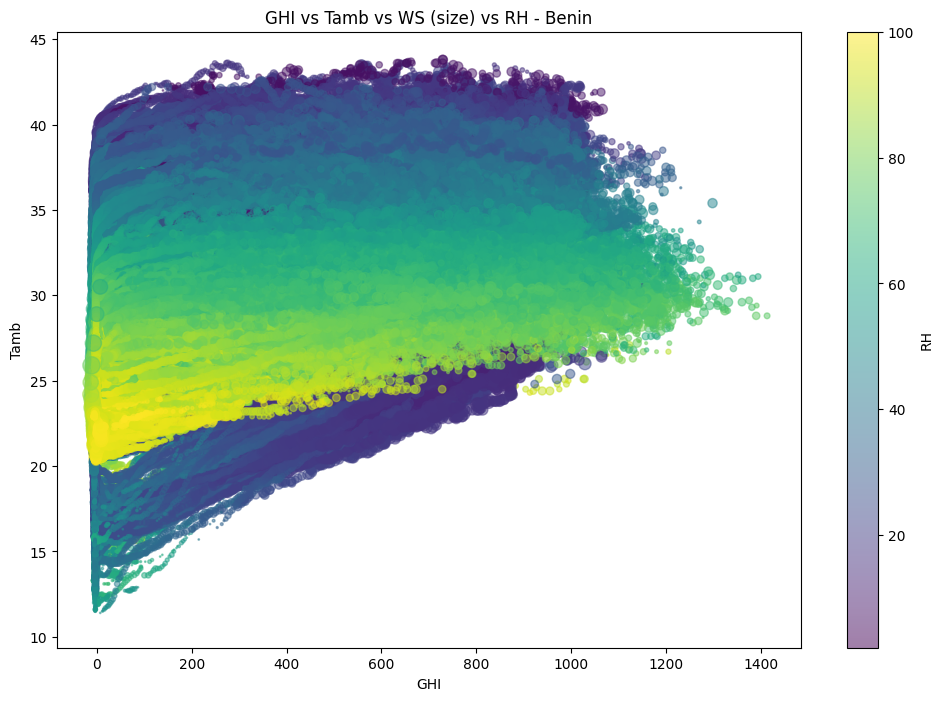

In [18]:
plot_bubble_chart(benin_data, 'Benin')